In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# 1. Load & Inspect Data
def load_data(filepath):
    df = pd.read_csv(filepath)
    print(f"Initial shape: {df.shape}")
    print(df.info())
    return df

df = load_data("netflix1.csv")


Initial shape: (8790, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [ ]:

# 2. Clean Data
def clean_data(df):
    df = df.drop_duplicates()
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    # Drop rows where date_added could not be parsed
    df = df.dropna(subset=['date_added'])
    # Handle missing director/country
    df['director'] = df['director'].fillna('Unknown')
    df['country'] = df['country'].fillna('NotSpecified')
    return df

df_clean = clean_data(df)
print(f"Cleaned shape: {df_clean.shape}")

Cleaned shape: (8790, 10)


In [ ]:
# 3. Feature Engineering
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month_name()
df_clean['year_released'] = df_clean['release_year']

# Extract duration for movies and seasons for TV shows
df_clean['duration_value'] = df_clean['duration'].str.extract(r'(\d+)').astype(int)
df_clean['duration_unit'] = df_clean['duration'].str.extract(r'([a-zA-Z]+)')


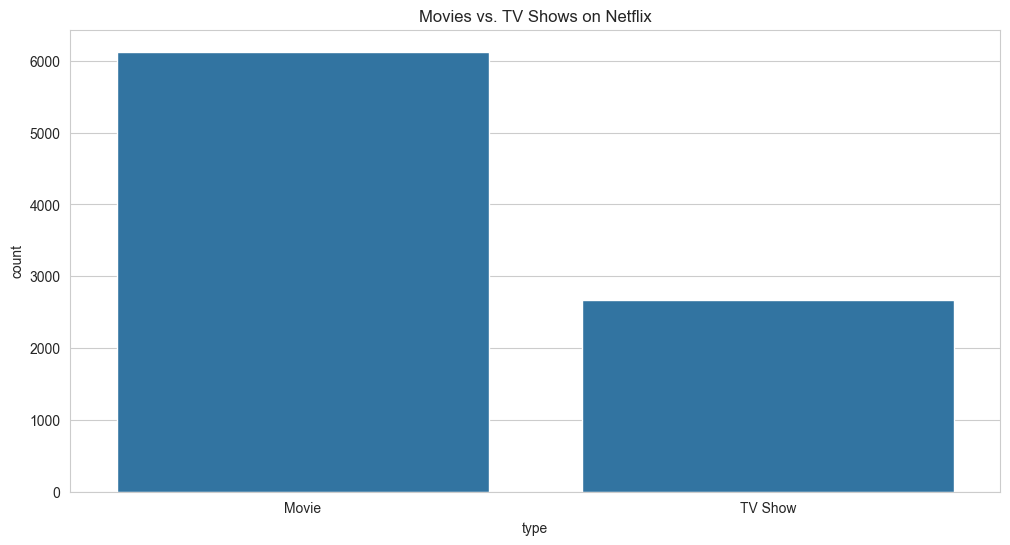

In [ ]:

# 4. Exploratory Analysis

## 4.1 Type Distribution
sns.countplot(data=df_clean, x='type')
plt.title("Movies vs. TV Shows on Netflix")
plt.show()


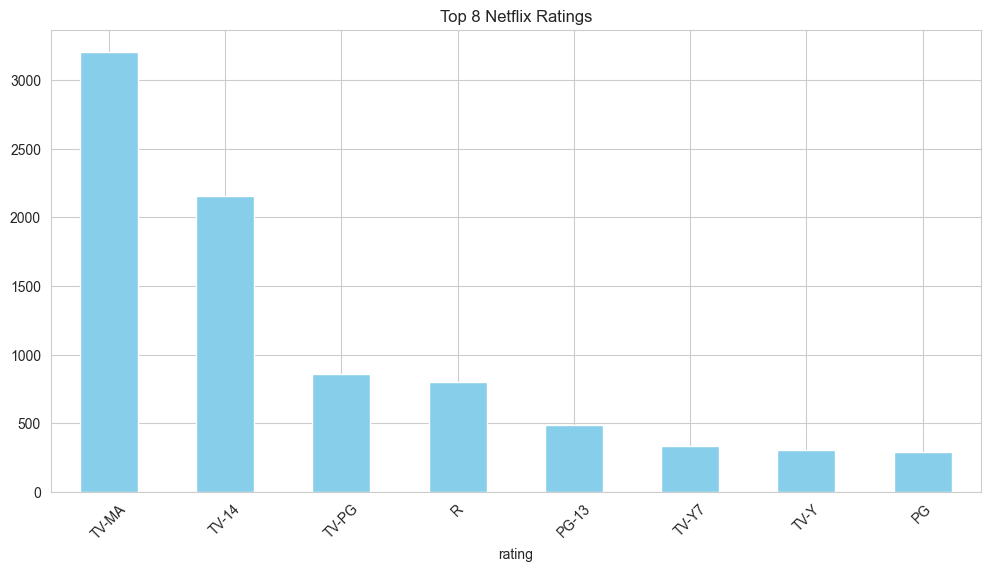

In [ ]:
## 4.2 Rating Distribution (Top 8)
top_ratings = df_clean['rating'].value_counts().head(8)
top_ratings.plot(kind='bar', color='skyblue')
plt.title("Top 8 Netflix Ratings")
plt.xticks(rotation=45)
plt.show()


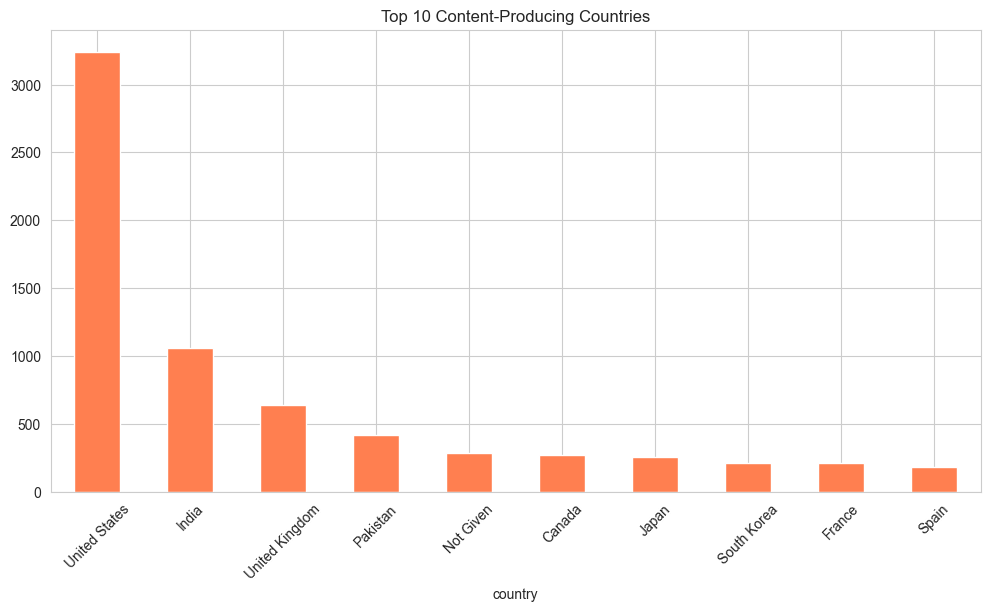

In [ ]:

## 4.3 Country-wise Content
top_countries = df_clean['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='coral')
plt.title("Top 10 Content-Producing Countries")
plt.xticks(rotation=45)
plt.show()

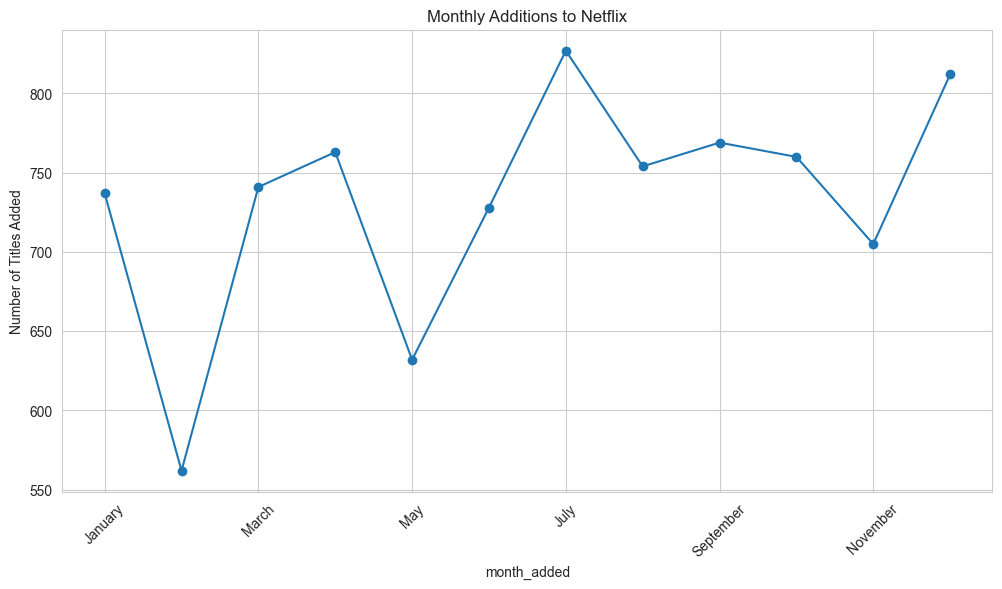

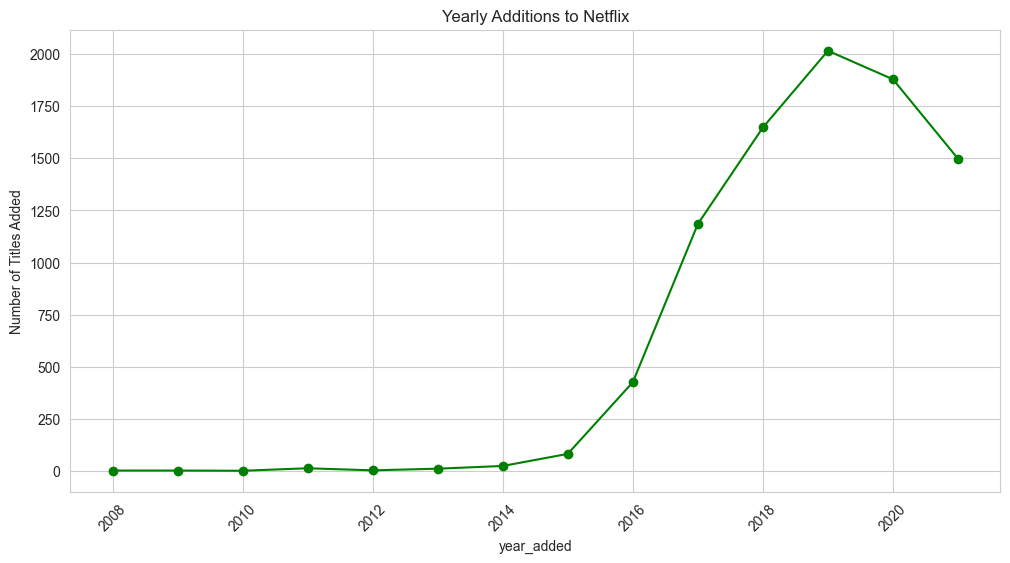

In [ ]:
## 4.4 Monthly & Yearly Trends
monthly = df_clean['month_added'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])
monthly.plot(kind='line', marker='o')
plt.title("Monthly Additions to Netflix")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.show()

yearly = df_clean['year_added'].value_counts().sort_index()
yearly.plot(kind='line', marker='o', color='green')
plt.title("Yearly Additions to Netflix")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.show()

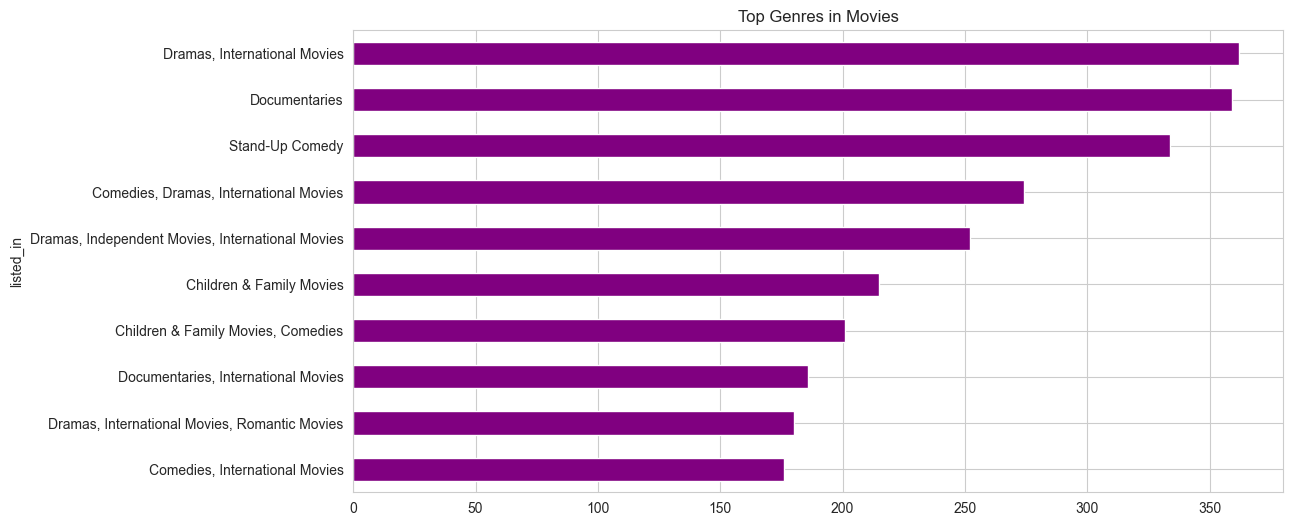

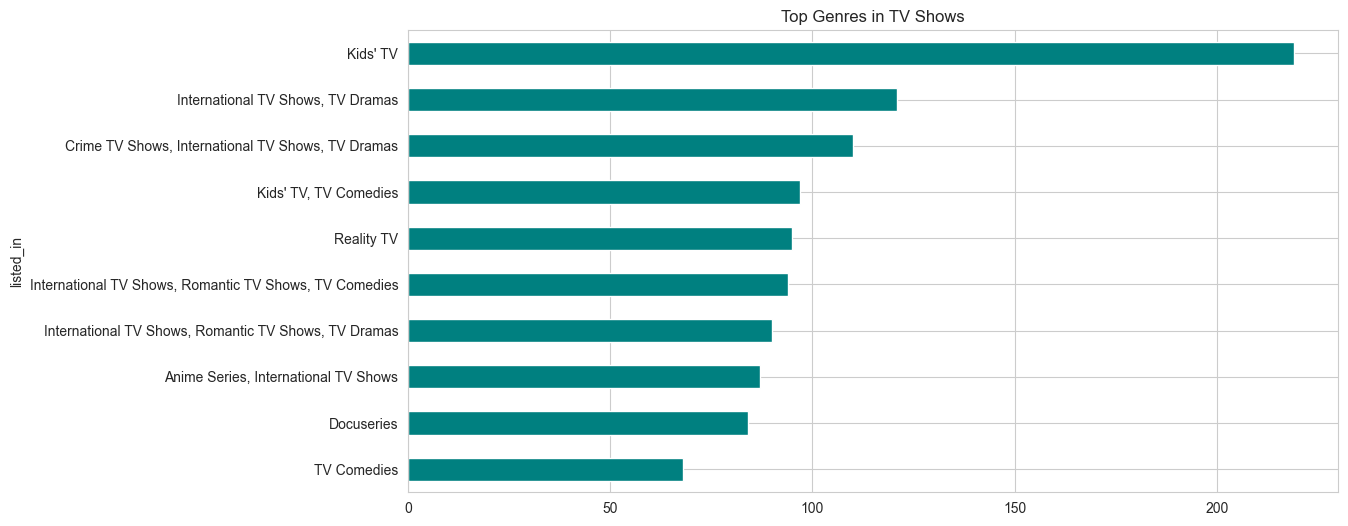

In [ ]:
# 5. Genre & Director Insights

## 5.1 Top Genres for Movies & TV
def top_genres(df, type_filter, top_n=10):
    subset = df[df['type'] == type_filter]
    return subset['listed_in'].value_counts().nlargest(top_n)

top_movie_genres = top_genres(df_clean, 'Movie')
top_tv_genres = top_genres(df_clean, 'TV Show')

plt.figure()
top_movie_genres.plot(kind='barh', color='purple')
plt.title("Top Genres in Movies")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
top_tv_genres.plot(kind='barh', color='teal')
plt.title("Top Genres in TV Shows")
plt.gca().invert_yaxis()
plt.show()

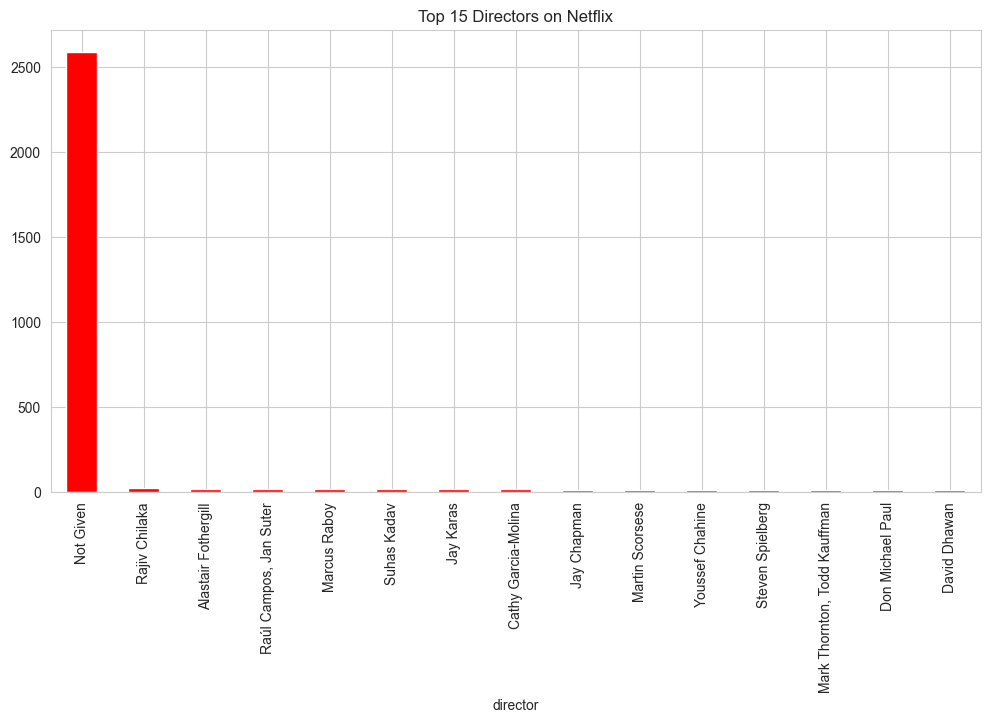

In [ ]:
top_dirs = df_clean['director'].value_counts().nlargest(15)
plt.figure()
top_dirs.plot(kind='bar', color='red')
plt.title("Top 15 Directors on Netflix")
plt.xticks(rotation=90)
plt.show()

In [2]:
import pandas as pd

# Load and clean data before using df_clean
df = pd.read_csv("netflix1.csv")

# Cleaning steps
df = df.drop_duplicates()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('NotSpecified')

# Feature engineering
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df['year_released'] = df['release_year']
df['duration_value'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract(r'([a-zA-Z]+)')

# Save as df_clean
df_clean = df.copy()

# Create top_ratings if needed
top_ratings = df_clean['rating'].value_counts().head(8)


In [3]:
import plotly.express as px

fig = px.box(
    df_clean,
    x='rating',
    y='release_year',
    category_orders={'rating': top_ratings.index.tolist()},
    title="Release Year Distribution by Rating",
    labels={'release_year': 'Release Year', 'rating': 'Rating'},
    points='all',
    hover_data=df_clean.columns
)

fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    height=600
)

fig.show()


In [4]:

# 7. Save Cleaned Dataset
df_clean.to_csv("netflix_cleaned.csv", index=False)
print("Cleaned dataset saved as netflix_cleaned.csv")

Cleaned dataset saved as netflix_cleaned.csv
